In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jsonschema.exceptions import best_match
from numpy.ma.core import transpose

In [3]:
df= pd.read_csv('house_price_prediction_dataset.csv')
len(df)

500

In [4]:
df.head()

,bedrooms,lot_size,distance_to_city_center,crime_rate,age_of_building,nearby_schools,avg_neighbourhood_income,property_tax_rate,has_garage,basement_quality,price
0,4,6958.218211,15.159223,17.483863,82,5,49027.298942,0.625130,0,Excellent,202070.267189
1,5,5031.505762,2.572198,50.256608,97,2,44652.067330,0.921014,0,Good,236653.003295
2,3,6022.929457,11.335251,39.866303,6,5,44550.979936,2.118047,0,Poor,134004.412359
3,5,4534.599865,14.448154,14.637399,91,9,48764.527936,0.793844,0,Good,213226.811216
4,5,5486.249529,10.411420,36.753442,23,9,78260.603546,1.185290,0,NaN,220244.551532


In [5]:
df.isnull().sum()

bedrooms                     0
lot_size                     0
distance_to_city_center      0
crime_rate                   0
age_of_building              0
nearby_schools               0
avg_neighbourhood_income    10
property_tax_rate            0
has_garage                   0
basement_quality            47
price                        0
dtype: int64

In [6]:
df[df['lot_size']>12500]

,bedrooms,lot_size,distance_to_city_center,crime_rate,age_of_building,nearby_schools,avg_neighbourhood_income,property_tax_rate,has_garage,basement_quality,price
118,1,13787.669245,2.759930,17.410934,29,1,61313.673284,1.521162,1,Fair,158128.096870
161,1,13879.337822,0.552296,81.594694,56,2,68519.126146,1.722927,0,Good,130634.168929
197,1,14773.928507,10.987998,24.667886,11,4,60061.395115,1.823827,0,Poor,58781.590147
251,4,13163.660821,4.401651,33.423832,10,6,68997.889498,0.929392,0,Fair,257791.006711
486,1,19222.277127,6.659548,27.927609,72,7,50105.965972,2.148701,0,Excellent,101247.571219


In [7]:
df['basement_quality'].unique()

array(['Excellent', 'Good', 'Poor', nan, 'Fair'], dtype=object)

In [8]:
df['basement_quality']=df['basement_quality'].replace(to_replace={'Excellent':4,'Good':3,'Fair':2,'Poor':1})

/var/folders/8k/zvxl83yn6b9_cfl3t_rvc8rw0000gn/T/ipykernel_1918/1745469168.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['basement_quality']=df['basement_quality'].replace(to_replace={'Excellent':4,'Good':3,'Fair':2,'Poor':1})


In [9]:
df

,bedrooms,lot_size,distance_to_city_center,crime_rate,age_of_building,nearby_schools,avg_neighbourhood_income,property_tax_rate,has_garage,basement_quality,price
0,4,6958.218211,15.159223,17.483863,82,5,49027.298942,0.625130,0,4.0,202070.267189
1,5,5031.505762,2.572198,50.256608,97,2,44652.067330,0.921014,0,3.0,236653.003295
2,3,6022.929457,11.335251,39.866303,6,5,44550.979936,2.118047,0,1.0,134004.412359
3,5,4534.599865,14.448154,14.637399,91,9,48764.527936,0.793844,0,3.0,213226.811216
4,5,5486.249529,10.411420,36.753442,23,9,78260.603546,1.185290,0,NaN,220244.551532
...,...,...,...,...,...,...,...,...,...,...,...
495,1,3658.089047,12.373491,93.830482,61,5,48582.204228,0.812403,0,3.0,51665.414056
496,3,4719.692534,9.874865,87.120448,31,4,54277.137912,2.476842,0,3.0,145399.640815
497,1,4340.403413,14.088831,76.606478,80,8,51297.845227,2.454560,1,4.0,121334.473679
498,1,7170.466827,16.951038,78.844734,96,9,NaN,2.087636,0,NaN,81596.534754


In [10]:
df['basement_quality']=df['basement_quality'].fillna(0)

In [11]:
df.isnull().sum()

bedrooms                     0
lot_size                     0
distance_to_city_center      0
crime_rate                   0
age_of_building              0
nearby_schools               0
avg_neighbourhood_income    10
property_tax_rate            0
has_garage                   0
basement_quality             0
price                        0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bedrooms                  500 non-null    int64  
 1   lot_size                  500 non-null    float64
 2   distance_to_city_center   500 non-null    float64
 3   crime_rate                500 non-null    float64
 4   age_of_building           500 non-null    int64  
 5   nearby_schools            500 non-null    int64  
 6   avg_neighbourhood_income  490 non-null    float64
 7   property_tax_rate         500 non-null    float64
 8   has_garage                500 non-null    int64  
 9   basement_quality          500 non-null    float64
 10  price                     500 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 43.1 KB


In [13]:
df.isnull().sum()

bedrooms                     0
lot_size                     0
distance_to_city_center      0
crime_rate                   0
age_of_building              0
nearby_schools               0
avg_neighbourhood_income    10
property_tax_rate            0
has_garage                   0
basement_quality             0
price                        0
dtype: int64

In [14]:
df[df.isnull().any(axis=1)]

,bedrooms,lot_size,distance_to_city_center,crime_rate,age_of_building,nearby_schools,avg_neighbourhood_income,property_tax_rate,has_garage,basement_quality,price
16,4,4981.629841,3.277747,64.082631,78,9,NaN,1.747997,0,1.0,248793.413171
107,4,7633.011264,4.867424,7.208434,47,0,NaN,1.474531,0,2.0,232465.095655
121,4,5111.142171,7.489729,76.437266,55,5,NaN,1.519708,0,1.0,177828.363974
195,3,3753.574825,7.323824,46.155747,11,2,NaN,0.993317,1,2.0,181510.299912
296,5,5981.548485,9.046588,72.793931,30,2,NaN,1.106572,0,0.0,203178.732386
317,2,7294.325479,12.109604,77.671056,28,7,NaN,1.209332,1,4.0,160578.071959
326,3,4496.322951,8.512182,34.734333,20,5,NaN,1.209795,1,3.0,174795.329286
477,1,5311.531531,22.464998,12.626474,35,7,NaN,2.272172,0,4.0,129525.824739
478,5,5407.368256,9.969645,67.617756,48,9,NaN,2.291380,0,1.0,211696.348442
498,1,7170.466827,16.951038,78.844734,96,9,NaN,2.087636,0,0.0,81596.534754


In [15]:
df.dtypes

bedrooms                      int64
lot_size                    float64
distance_to_city_center     float64
crime_rate                  float64
age_of_building               int64
nearby_schools                int64
avg_neighbourhood_income    float64
property_tax_rate           float64
has_garage                    int64
basement_quality            float64
price                       float64
dtype: object

In [16]:
def missing_percentage(daf):
    percent_missing=100* daf.isnull().sum() /len(df)
    greate_than_zero=percent_missing[percent_missing>0].sort_values()
    return greate_than_zero

missing_values=missing_percentage(df)
print(missing_values)

avg_neighbourhood_income    2.0
dtype: float64


In [17]:
len(df)

500

In [18]:
df=df.dropna(axis=0)

In [19]:
df.isnull().sum()

bedrooms                    0
lot_size                    0
distance_to_city_center     0
crime_rate                  0
age_of_building             0
nearby_schools              0
avg_neighbourhood_income    0
property_tax_rate           0
has_garage                  0
basement_quality            0
price                       0
dtype: int64

In [20]:
df.corr()['price'].sort_values()

distance_to_city_center    -0.212829
crime_rate                 -0.063224
age_of_building            -0.034512
avg_neighbourhood_income    0.029744
property_tax_rate           0.035094
basement_quality            0.076145
lot_size                    0.106793
nearby_schools              0.208047
has_garage                  0.209292
bedrooms                    0.812221
price                       1.000000
Name: price, dtype: float64

In [21]:
df.describe()

,bedrooms,lot_size,distance_to_city_center,crime_rate,age_of_building,nearby_schools,avg_neighbourhood_income,property_tax_rate,has_garage,basement_quality,price
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,2.965306,5063.245066,10.672322,49.741557,50.065306,4.575510,60633.752930,1.467495,0.522449,2.528571,179047.977328
std,1.426029,1799.449324,4.815978,28.880365,27.448927,2.859958,14485.062827,0.576127,0.500006,1.181054,53617.099153
min,1.000000,954.670036,0.008997,0.321826,1.000000,0.000000,19728.179293,0.501307,0.000000,0.000000,43404.603230
25%,2.000000,3924.433083,7.186053,24.081990,27.250000,2.000000,49786.165329,0.962809,0.000000,2.000000,136915.787230
50%,3.000000,4980.135667,10.666276,50.552973,49.000000,5.000000,61237.889533,1.418708,1.000000,3.000000,182378.893191
75%,4.000000,5947.088272,13.800216,74.863805,73.000000,7.000000,71560.319006,1.978034,1.000000,3.000000,217286.820200
max,5.000000,19222.277127,22.898547,99.834751,99.000000,9.000000,105929.204481,2.499115,1.000000,4.000000,304224.739077


In [22]:
transpose_df_mean_median=df.describe().loc[['mean','50%']].transpose()
transpose_df_mean_median['difference']=abs(transpose_df_mean_median['mean']-transpose_df_mean_median['50%'])
transpose_df_mean_median

,mean,50%,difference
bedrooms,2.965306,3.000000,0.034694
lot_size,5063.245066,4980.135667,83.109399
distance_to_city_center,10.672322,10.666276,0.006046
crime_rate,49.741557,50.552973,0.811416
age_of_building,50.065306,49.000000,1.065306
nearby_schools,4.575510,5.000000,0.424490
avg_neighbourhood_income,60633.752930,61237.889533,604.136603
property_tax_rate,1.467495,1.418708,0.048787
has_garage,0.522449,1.000000,0.477551
basement_quality,2.528571,3.000000,0.471429


<Axes: xlabel='avg_neighbourhood_income', ylabel='price'>

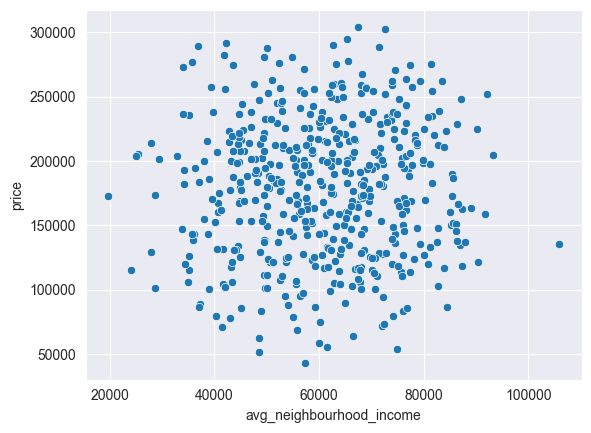

In [23]:
sns.scatterplot(data=df, x='avg_neighbourhood_income', y='price')

<Axes: xlabel='lot_size', ylabel='price'>

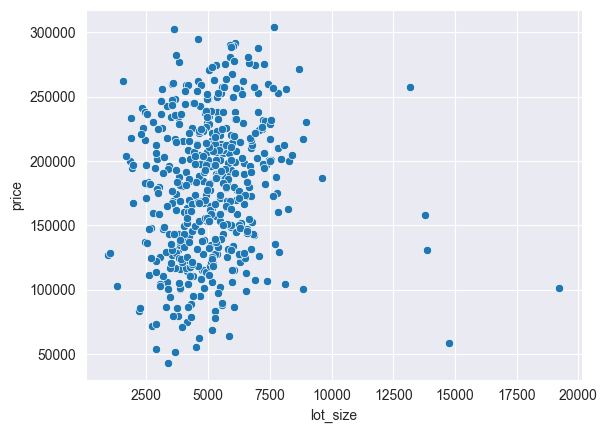

In [24]:
sns.scatterplot(data=df, x='lot_size', y='price')

<Axes: xlabel='price', ylabel='lot_size'>

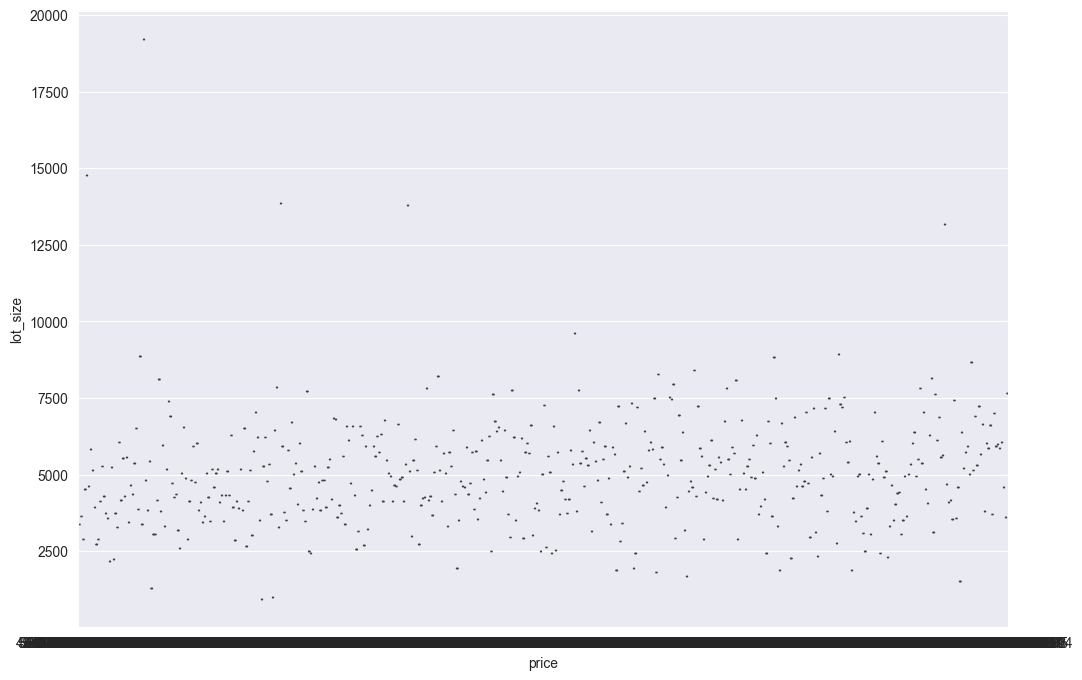

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, y='lot_size', x='price')

In [26]:
df[df['lot_size']>12500]

,bedrooms,lot_size,distance_to_city_center,crime_rate,age_of_building,nearby_schools,avg_neighbourhood_income,property_tax_rate,has_garage,basement_quality,price
118,1,13787.669245,2.759930,17.410934,29,1,61313.673284,1.521162,1,2.0,158128.096870
161,1,13879.337822,0.552296,81.594694,56,2,68519.126146,1.722927,0,3.0,130634.168929
197,1,14773.928507,10.987998,24.667886,11,4,60061.395115,1.823827,0,1.0,58781.590147
251,4,13163.660821,4.401651,33.423832,10,6,68997.889498,0.929392,0,2.0,257791.006711
486,1,19222.277127,6.659548,27.927609,72,7,50105.965972,2.148701,0,4.0,101247.571219


In [27]:
df[df['avg_neighbourhood_income']>100000]

,bedrooms,lot_size,distance_to_city_center,crime_rate,age_of_building,nearby_schools,avg_neighbourhood_income,property_tax_rate,has_garage,basement_quality,price
455,2,7718.672837,16.180466,82.16369,70,3,105929.204481,1.485071,1,2.0,135859.368366


<Axes: xlabel='lot_size', ylabel='price'>

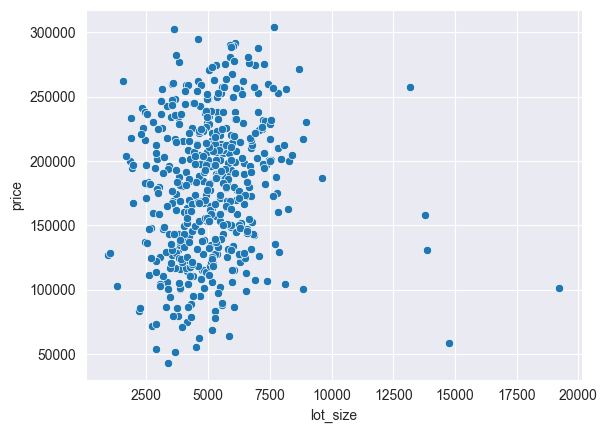

In [28]:
sns.scatterplot(data=df, x='lot_size', y='price')

In [29]:
def filter_outliers_on_lot_size(df):
    Q1,Q3=np.percentile(df['lot_size'],[25,75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df=df[(df['lot_size']<upper_bound)&(df['lot_size']>lower_bound)]
    return filtered_df

In [30]:
final_df=filter_outliers_on_lot_size(df)

In [31]:
len(final_df)

484

In [32]:
final_df.head()

,bedrooms,lot_size,distance_to_city_center,crime_rate,age_of_building,nearby_schools,avg_neighbourhood_income,property_tax_rate,has_garage,basement_quality,price
0,4,6958.218211,15.159223,17.483863,82,5,49027.298942,0.625130,0,4.0,202070.267189
1,5,5031.505762,2.572198,50.256608,97,2,44652.067330,0.921014,0,3.0,236653.003295
2,3,6022.929457,11.335251,39.866303,6,5,44550.979936,2.118047,0,1.0,134004.412359
3,5,4534.599865,14.448154,14.637399,91,9,48764.527936,0.793844,0,3.0,213226.811216
4,5,5486.249529,10.411420,36.753442,23,9,78260.603546,1.185290,0,0.0,220244.551532


In [33]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [34]:
model=ElasticNet()

In [35]:

X=final_df.drop('price',axis=1)
y=final_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [36]:
# best_parameters_list=[]
# train_rmse_errors_list=[]
# test_rmse_errors_list=[]
# param_grid={'alpha':[19,20.5,20,30,20.9],'l1_ratio':[1,.1,.01,.99,.5,.05],'max_iter':[100000]}
# for i in range(1,4):
#     features=PolynomialFeatures(degree=i)
#     features.fit(X_train)
#     X_train=features.transform(X_train)
#     X_test=features.transform(X_test)
#     sc=StandardScaler()
#     sc.fit(X_train)
#     X_train=sc.transform(X_train)
#     X_test=sc.transform(X_test)
#     print('yyyy')
#     grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error')
#     grid_search.fit(X_train,y_train)
#
#     best_match=grid_search.best_params_
#     best_parameters_list.append(best_match)
#
#     train_prediction=grid_search.predict(X_train)
#     train_mae_error=mean_absolute_error(y_train,train_prediction)
#     train_r_2_error=r2_score(y_train,train_prediction)
#     train_rmse_error=np.sqrt(mean_squared_error(y_train,train_prediction))
#     train_rmse_errors_list.append(train_rmse_error)
#
#     test_prediction=grid_search.predict(X_test)
#     test_rmse_error=np.sqrt(mean_squared_error(y_test, test_prediction))
#     test_mae_error=mean_absolute_error(y_test, test_prediction)
#     test_r_2_error=r2_score(y_test, test_prediction)
#     test_rmse_errors_list.append(test_rmse_error)
#
#     print(f'Best parameters:{best_match}')
#     print (f'Train Errors for, \nDegree{i}, \nRMSE:{train_rmse_error},\n MAE(:{train_mae_error}, \nR2 Score:{train_r_2_error} ')
#
#     print(f'Test Errors for, \nDegree{i}, \nRMSE:{test_rmse_error},\n MAE(:{test_mae_error}, \nR2 Score:{test_r_2_error} ')
#
# print("\nBest Parameters for each polynomial degree:")
# print(best_parameters_list)




In [37]:
param_grid={'alpha':[19,20.5,20,30,20.9],'l1_ratio':[1,.1,.01,.99,.5,.05],'max_iter':[100000]}
features=PolynomialFeatures(degree=2)
features.fit(X_train)
poly_X_train=features.transform(X_train)
poly_X_test=features.transform(X_test)
sc=StandardScaler()
sc.fit(poly_X_train)
poly_X_train=sc.transform(poly_X_train)
poly_X_test=sc.transform(poly_X_test)

grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(poly_X_train,y_train)

best_match_poly=grid_search.best_params_

train_prediction=grid_search.predict(poly_X_train)
train_rmse_error=np.sqrt(mean_squared_error(y_train,train_prediction))
train_mae_error=mean_absolute_error(y_train,train_prediction)
train_r_2=r2_score(y_train,train_prediction)


test_prediction=grid_search.predict(poly_X_test)
test_rmse=np.sqrt(mean_squared_error(y_test, test_prediction))
test_mae=mean_absolute_error(y_test, test_prediction)
test_r_2=r2_score(y_test, test_prediction)
print(f'MAE(Train):{train_mae_error},\nMAE(Test):{test_mae},\nRMSE(Train){train_rmse_error},\nRMSE(Test):{test_rmse},\nR2(Train):{train_r_2},\nR2(Test):{test_r_2}')
print(f'Best Parameters={best_match_poly}')

MAE(Train):18910.90433808865,
MAE(Test):19209.28659482828,
RMSE(Train)24070.460433333275,
RMSE(Test):24613.985809842423,
R2(Train):0.8086229140835468,
R2(Test):0.7121996488008933
Best Parameters={'alpha': 19, 'l1_ratio': 0.99, 'max_iter': 100000}


In [38]:
# X_train.shape
param_grid_2={'alpha':[.02,.001,.1,0.09,.01],'l1_ratio':[.02,.001,.01,.09],'max_iter':[100000]}
sc_2=StandardScaler()
np_X_train=sc_2.fit_transform(X_train)

np_X_test=sc_2.transform(X_test)

grid_search_2=GridSearchCV(estimator=model,param_grid=param_grid_2,cv=5,scoring='neg_mean_squared_error')
grid_search_2.fit(np_X_train,y_train)
np_best_match=grid_search_2.best_params_

np_train_prediction=grid_search_2.predict(np_X_train)
np_train_rmse_error=np.sqrt(mean_squared_error(y_train,np_train_prediction))
np_train_mae_error=mean_absolute_error(y_train,np_train_prediction)
np_train_r_2=r2_score(y_train,np_train_prediction)

np_test_prediction=grid_search_2.predict(np_X_test)
np_test_rmse=np.sqrt(mean_squared_error(y_test, np_test_prediction))
np_test_mae=mean_absolute_error(y_test, np_test_prediction)
np_test_r_2=r2_score(y_test, np_test_prediction)

print(f'MAE(Train):{np_train_mae_error},\nMAE(Test):{np_test_mae},\nRMSE(Train){np_train_rmse_error},\nRMSE(Test):{np_test_rmse},\nR2(Train):{np_train_r_2},\nR2(Test):{np_test_r_2}')
print(f'Best Parameters={np_best_match}')




MAE(Train):19634.93799011412,
MAE(Test):19109.94674614736,
RMSE(Train)24799.242716620807,
RMSE(Test):24214.44938912927,
R2(Train):0.796858815665574,
R2(Test):0.7214670210741992
Best Parameters={'alpha': 0.01, 'l1_ratio': 0.001, 'max_iter': 100000}


In [42]:
final_model=ElasticNet(alpha=0.01,l1_ratio=.001,max_iter=100000)
final_scaler=StandardScaler()
scaled_X=final_scaler.fit_transform(X)

In [43]:
final_model.fit(scaled_X,y)

ElasticNet(alpha=0.01, l1_ratio=0.001, max_iter=100000)

In [44]:
from joblib import dump, load
dump(final_model,'house_prediction_model.joblib')
dump(final_scaler,'house_prediction_scaler.joblib')

['house_prediction_scaler.joblib']